## Object Detection Project
-----
 
### Problem Description 

 - We have a system that produces a stream of frames such that each frame is a solid white background with some 2d objects in the foreground.
 - The stream of successive frames describes the movement of these objects with in the image across time.
 - Here is an example of the kind of images that our system produces.
 - Your task is to write a **"ObjectTracker"** component.
 - Your Object Tracker will expose a single function or method called **"analyze_frame"**.
 - As our system produces frames, each one will passed, one at a time, to your ObjectTracker component through your analyze_frame().
 - `analyze_frame()` will process each new frame-image and return two types of information about the frame.
   
     1. A list of unique identifiers such that each unique identifier corresponds to one unique
object that is visible in the input frame. When a previously unseen object appears on a
frame, it should be assigned a new unique identifier and that identifier should be
returned in the list of unique identifiers returned by `analyze_frame()` and that same
unique identifier should be returned in the array of identifiers for each successive frame
that also contains that object. If/when that object exits the frame, that identifier should no
longer appear in the array returned by `analyze_frame()`.
     2. Information about location of each object. It can either find the centroid location of each
object or find a bounding box that surrounds the object.Please be prepared to walk us through the solution you came up with for this and the various
trade-offs you had to consider when writing your solution and your sense of the limitations and
shortcoming of your solution.
 
### Dataset

Sample data sequence 1:
https://www.dropbox.com/s/dx8f5ng4ui0aroi/sample1.zip?dl=0

Sample data sequence 2:
https://www.dropbox.com/s/njevjwkkhprnfeg/sample2.zip?dl=0

In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def read_frame(frame_path):
    return cv2.imread(frame_path)

def iterate_data(directory_path, data_format):
    for root, dirs, files in sorted(os.walk(directory_path)):
        for file in sorted(files):
            full_path = root + file
            yield full_path
    
def convert_color_space(image, flag=cv2.COLOR_BGR2RGB):
    return cv2.cvtColor(image, flag)

def draw_rect(frame, x, y, w, h):
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255, 0, 0),3) 
    
def draw_circle(frame, cX, cY):
    cv2.circle(frame, (cX, cY), 10, (255, 0, 0), -1)
    
def find_center(contour):
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return cX, cY
    
def analyze_frame(path, area_thr = 4000):
    contours, frame = perform_pre_processing(path)
    object_map = {}
    id_num = 0
    contour_list = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > area_thr :
            cX, cY = find_center(contour)
            draw_circle(frame, cX, cY)
            x, y, w, h = cv2.boundingRect(contour)
            draw_rect(frame, x, y, w, h)
            contour_list.append(contour)
            object_map[id_num] = [x, y, w, h, cX, cY]
            id_num = id_num + 1
    cv2.drawContours(frame, contour_list,  -1, (0, 0, 255), 2)
    plt.imshow(frame)
    plt.show()
    
    return object_map
    
def perform_pre_processing(path):
    frame = read_frame(path)
    hsv = convert_color_space(frame, flag=cv2.COLOR_BGR2HSV)
    hue, saturation, value = cv2.split(hsv)
    retval, thresholded = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY)
    medianFiltered = cv2.medianBlur(thresholded,5)
    _, contours, hierarchy = cv2.findContours(medianFiltered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours, frame
    
def start_analyzing(path_gen):
    for path in path_gen:      
        object_map = analyze_frame(path)
        print(object_map)


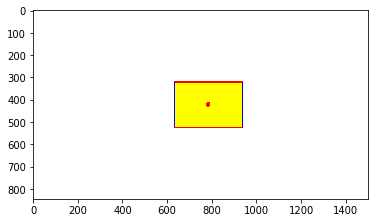

{0: [632, 321, 306, 202, 784, 421]}


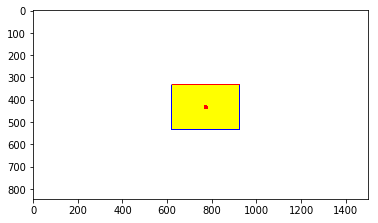

{0: [621, 334, 305, 201, 773, 434]}


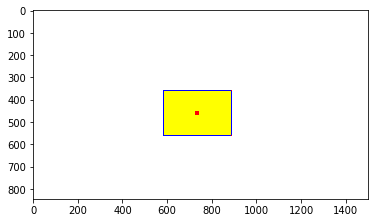

{0: [583, 359, 305, 201, 734, 459]}


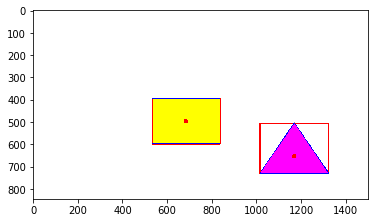

{0: [1016, 505, 308, 225, 1169, 653], 1: [533, 396, 305, 202, 684, 496]}


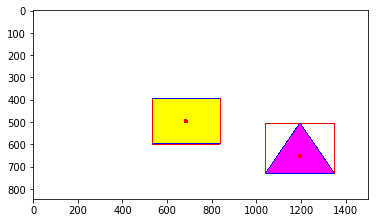

{0: [1041, 505, 308, 225, 1194, 653], 1: [533, 396, 305, 202, 684, 496]}


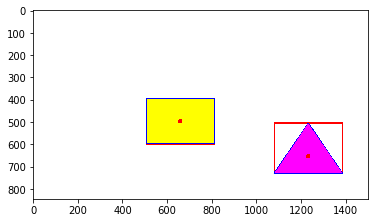

{0: [1079, 504, 308, 226, 1232, 653], 1: [508, 396, 305, 202, 659, 496]}


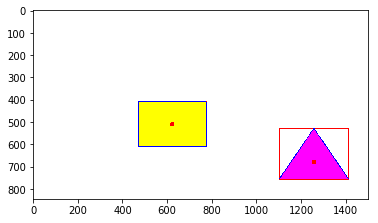

{0: [1104, 529, 308, 226, 1257, 678], 1: [471, 409, 305, 202, 623, 509]}


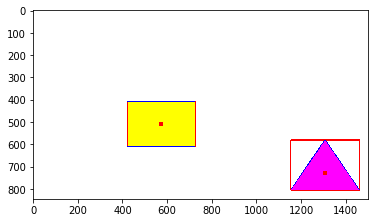

{0: [1154, 580, 308, 225, 1307, 728], 1: [421, 409, 305, 202, 573, 509]}


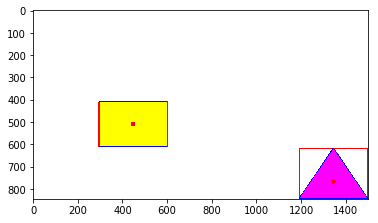

{0: [1192, 617, 307, 225, 1344, 765], 1: [295, 409, 306, 202, 447, 509]}


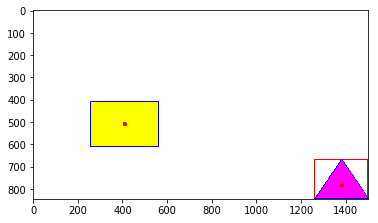

{0: [1261, 667, 238, 176, 1382, 783], 1: [258, 409, 305, 202, 410, 509]}


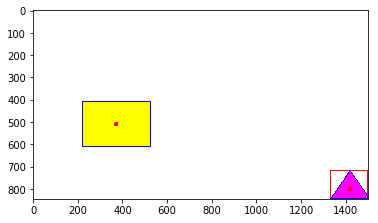

{0: [1333, 717, 166, 126, 1419, 799], 1: [220, 409, 306, 202, 372, 509]}


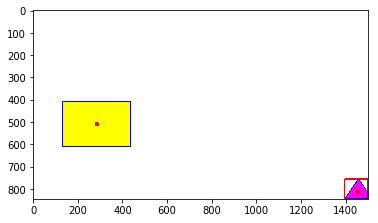

{0: [1396, 754, 103, 89, 1454, 811], 1: [133, 409, 305, 202, 285, 509]}


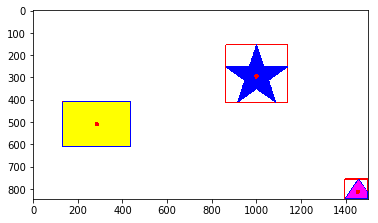

{0: [1396, 754, 103, 89, 1454, 811], 1: [133, 409, 305, 202, 285, 509], 2: [863, 155, 277, 258, 1000, 296]}


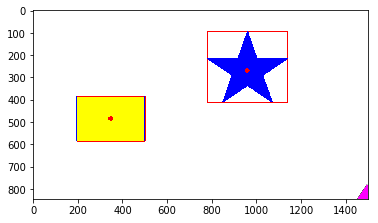

{0: [195, 384, 306, 201, 347, 484], 1: [782, 96, 357, 317, 959, 270]}


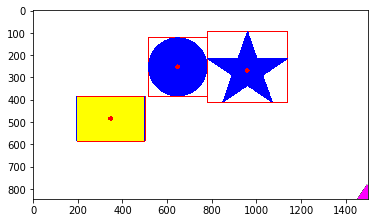

{0: [195, 384, 306, 201, 347, 484], 1: [517, 123, 263, 262, 647, 253], 2: [782, 96, 357, 317, 959, 270]}


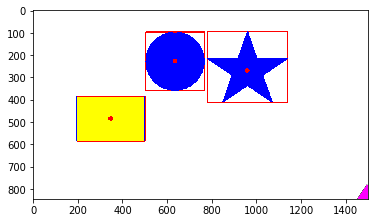

{0: [195, 384, 306, 201, 347, 484], 1: [504, 98, 263, 262, 635, 228], 2: [782, 96, 357, 317, 959, 270]}


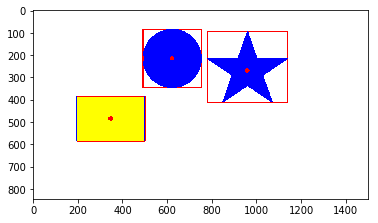

{0: [195, 384, 306, 201, 347, 484], 1: [782, 96, 357, 317, 959, 270], 2: [492, 86, 263, 261, 622, 215]}


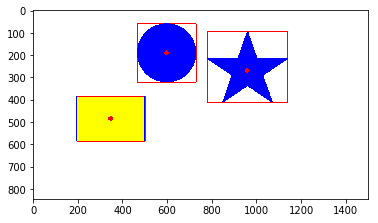

{0: [195, 384, 306, 201, 347, 484], 1: [782, 96, 357, 317, 959, 270], 2: [467, 61, 263, 261, 597, 190]}


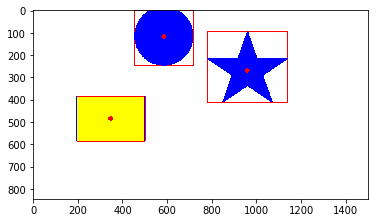

{0: [195, 384, 306, 201, 347, 484], 1: [782, 96, 357, 317, 959, 270], 2: [454, 1, 263, 246, 585, 118]}


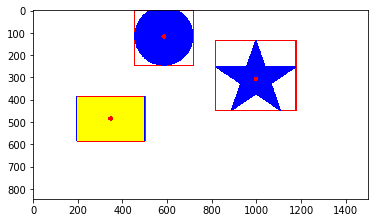

{0: [195, 384, 306, 201, 347, 484], 1: [818, 134, 359, 316, 997, 307], 2: [454, 1, 263, 246, 585, 118]}


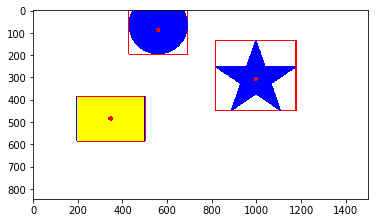

{0: [195, 384, 306, 201, 347, 484], 1: [818, 134, 359, 316, 997, 307], 2: [429, 1, 263, 196, 560, 88]}


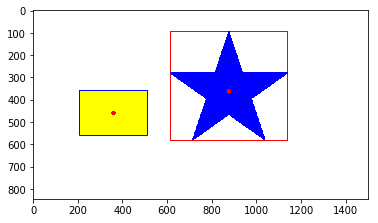

{0: [208, 359, 305, 201, 360, 459], 1: [614, 96, 526, 485, 876, 363]}


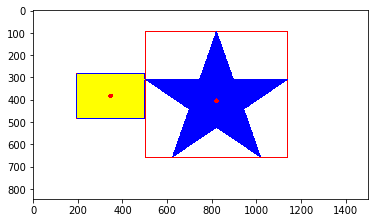

{0: [195, 284, 308, 201, 347, 383], 1: [504, 96, 635, 561, 821, 405]}


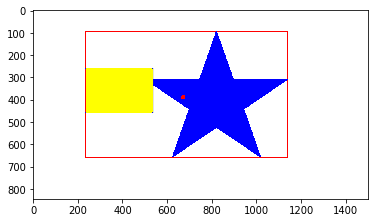

{0: [233, 96, 906, 561, 672, 389]}


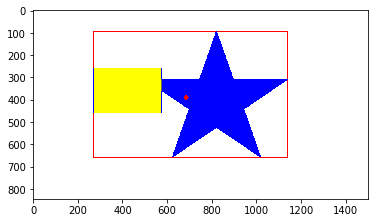

{0: [270, 96, 869, 561, 686, 390]}


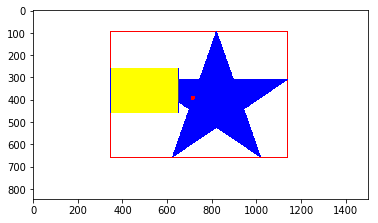

{0: [346, 96, 793, 561, 715, 391]}


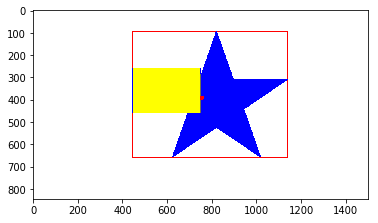

{0: [446, 96, 693, 561, 755, 392]}


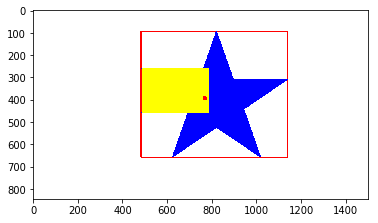

{0: [483, 96, 656, 561, 769, 394]}


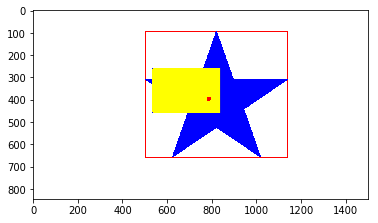

{0: [504, 96, 635, 561, 787, 396]}


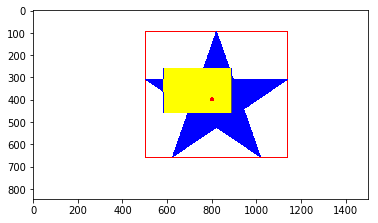

{0: [504, 96, 635, 561, 801, 398]}


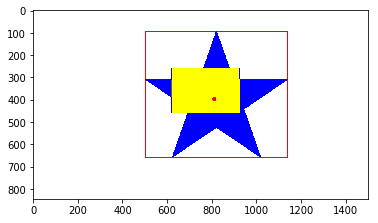

{0: [504, 96, 635, 561, 811, 397]}


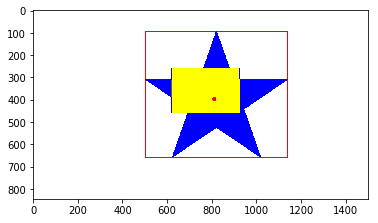

{0: [504, 96, 635, 561, 811, 397]}


In [25]:
dirname = os.path.dirname(os.path.realpath('__file__'))
path_gen = iterate_data(dirname+"/sample1/sample1/", "png")
start_analyzing(path_gen)

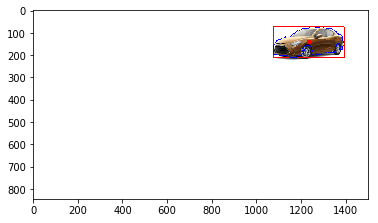

{0: [1075, 75, 318, 137, 1235, 143]}


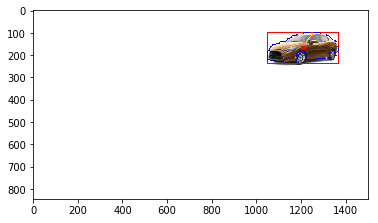

{0: [1050, 100, 318, 137, 1210, 168]}


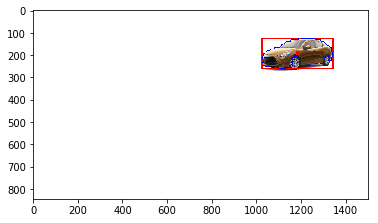

{0: [1025, 125, 318, 137, 1185, 193]}


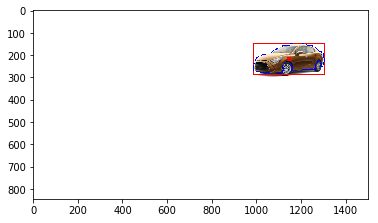

{0: [988, 150, 318, 137, 1147, 218]}


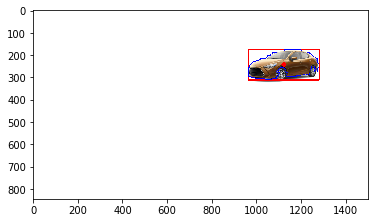

{0: [963, 175, 318, 137, 1122, 243]}


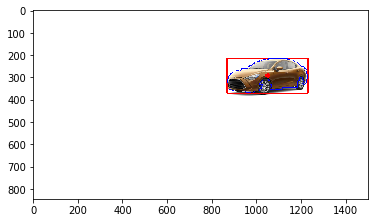

{0: [868, 215, 363, 156, 1050, 292]}


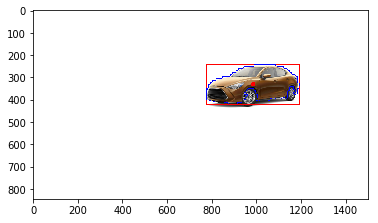

{0: [775, 243, 418, 178, 985, 331]}


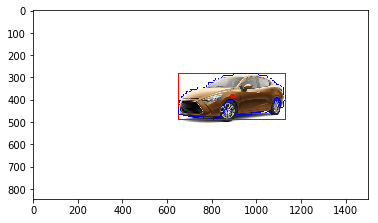

{0: [652, 282, 479, 206, 893, 384]}


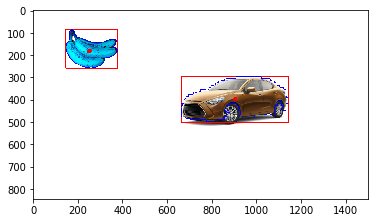

{0: [664, 295, 479, 206, 905, 397], 1: [147, 87, 232, 172, 252, 183]}


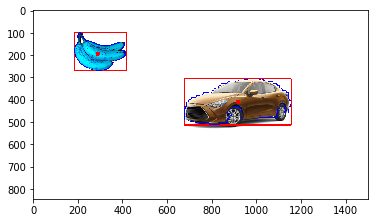

{0: [677, 307, 479, 206, 918, 409], 1: [184, 100, 233, 171, 289, 195]}


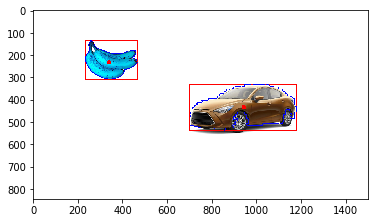

{0: [702, 332, 479, 206, 943, 434], 1: [234, 137, 233, 172, 340, 233]}


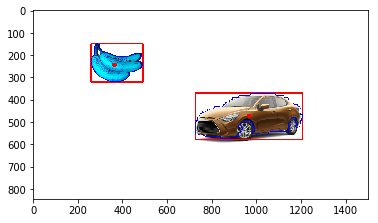

{0: [727, 370, 479, 206, 967, 472], 1: [259, 150, 233, 171, 364, 245]}


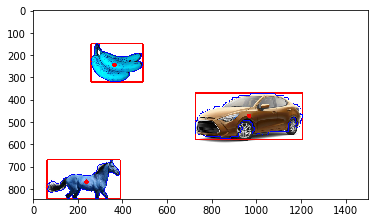

{0: [62, 669, 328, 174, 239, 766], 1: [727, 370, 479, 206, 967, 472], 2: [259, 150, 233, 171, 364, 245]}


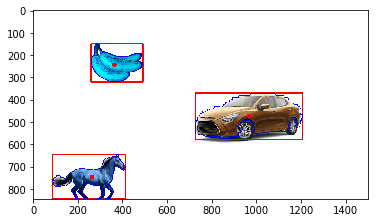

{0: [87, 644, 328, 199, 264, 746], 1: [727, 370, 479, 206, 967, 472], 2: [259, 150, 233, 171, 364, 245]}


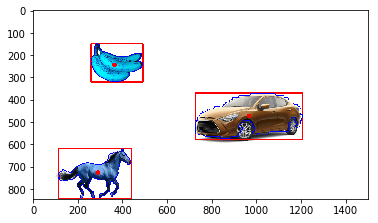

{0: [112, 619, 328, 223, 289, 725], 1: [727, 370, 479, 206, 967, 472], 2: [259, 150, 233, 171, 364, 245]}


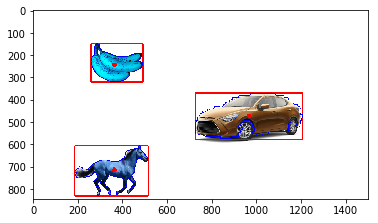

{0: [187, 606, 328, 224, 364, 712], 1: [727, 370, 479, 206, 967, 472], 2: [259, 150, 233, 171, 364, 245]}


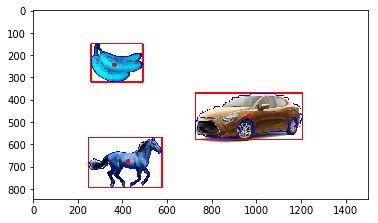

{0: [249, 568, 328, 225, 426, 675], 1: [727, 370, 479, 206, 967, 472], 2: [259, 150, 233, 171, 364, 245]}


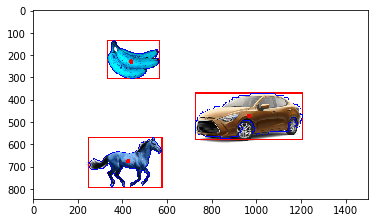

{0: [249, 568, 328, 225, 426, 675], 1: [727, 370, 479, 206, 967, 472], 2: [334, 135, 233, 171, 440, 230]}


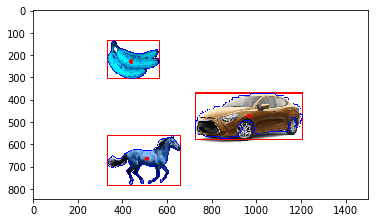

{0: [333, 558, 328, 224, 510, 664], 1: [727, 370, 479, 206, 967, 472], 2: [334, 135, 233, 171, 440, 230]}


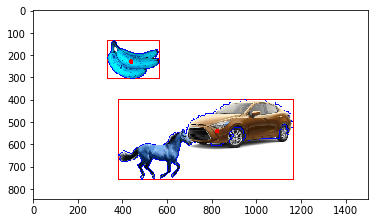

{0: [383, 400, 782, 357, 825, 541], 1: [334, 135, 233, 171, 440, 230]}


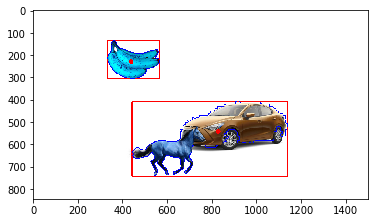

{0: [443, 409, 697, 333, 829, 542], 1: [334, 135, 233, 171, 440, 230]}


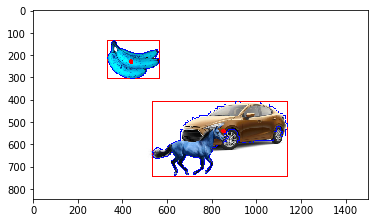

{0: [533, 409, 607, 333, 853, 541], 1: [334, 135, 233, 171, 440, 230]}


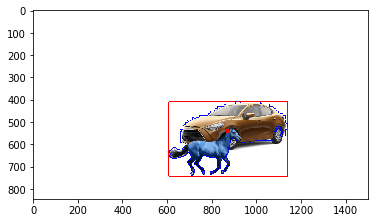

{0: [608, 409, 532, 333, 872, 541]}


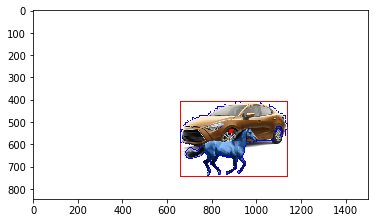

{0: [660, 409, 480, 333, 887, 541]}


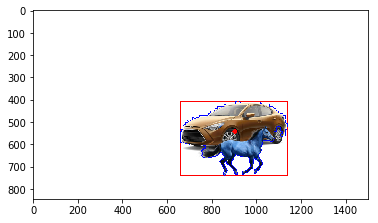

{0: [660, 409, 480, 331, 903, 542]}


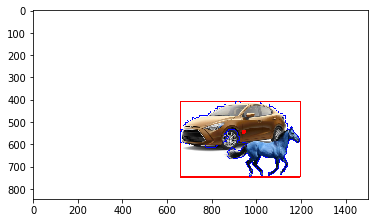

{0: [660, 409, 536, 336, 943, 544]}


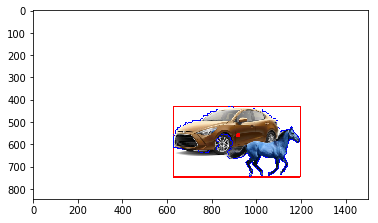

{0: [628, 431, 568, 314, 918, 559]}


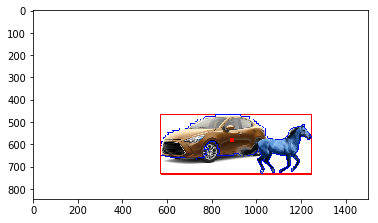

{0: [572, 465, 675, 267, 890, 580]}


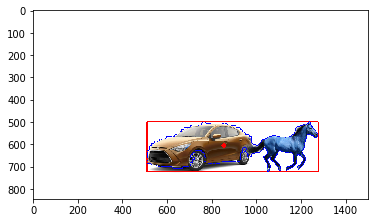

{0: [510, 498, 766, 224, 854, 605]}


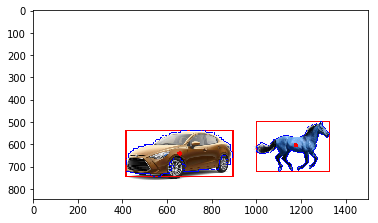

{0: [416, 538, 479, 205, 656, 640], 1: [999, 497, 328, 224, 1176, 603]}


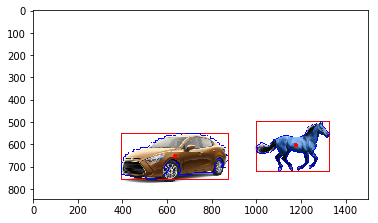

{0: [395, 551, 479, 206, 636, 653], 1: [999, 497, 328, 224, 1176, 603]}


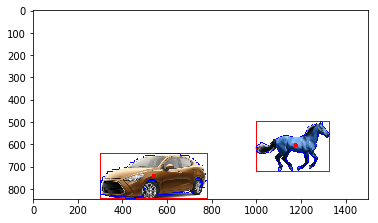

{0: [301, 639, 479, 204, 542, 741], 1: [999, 497, 328, 224, 1176, 603]}


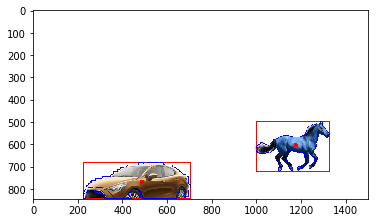

{0: [226, 681, 479, 162, 488, 768], 1: [999, 497, 328, 224, 1176, 603]}


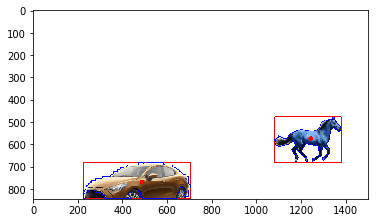

{0: [226, 681, 479, 162, 488, 768], 1: [1082, 477, 298, 203, 1243, 573]}


In [3]:
dirname = os.path.dirname(os.path.realpath('__file__'))
path_gen = iterate_data(dirname+"/sample2/sample2/", "png")
start_analyzing(path_gen)